# Data Science - Minneapolis & St. Paul Public Safety report Analysis

# Capstone Project

### Afewerk Nune 
### May 6th, 2019

## I. Definition
### Project Overivew

This capstone project is intended to explore the Minneapolis & St. Paul Public Safety reports from Oct 31, 2016 to Apr 29, 2019. There are 105000 data sets with 20 columns full of raw data. In this report we'll be using most of the colums to gain insite in to how public safety response, handling of each case, population demographics, and police use of power among certain groups or locations. 

This data only focuses on minneaplicemn.gov reported data and not including how the data was collected or maintained. Its also possible that some agencies report only if there are injuries, potential injuries, or verbal complaints (of involved suspects or citizens) as a result of a confrontation.

### Problem Statement

Problem to solve: Describe how each pricinct handles calles for given areas. Also test the data for bias in gender, race, economid and demographics. Give indeapth analysis of outliers in these groups and show predictions for future reports.

### Metrics

## II. Analysis

### Data Exploration

### Libraries to be used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# here is the data we're going to use for this project also downloaded from www.minneapolismn.gov/opendata
df = pd.DataFrame(pd.read_excel('data\Police_stop_data.xlsx'))

In [87]:
#let's get a sample of the data
df.sample(3)

,OBJECTID,masterIncidentNumber,responseDate,Non-Usable,responseTime,responseCode,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
110989,118990,19-109767,2019-04-19,T,12:47:45,.000Z,NO,YES,YES,Black,Black,Male,44.98444,-93.286492,-1.038460e+07,5.619072e+06,1.0,North Loop,2019-04-20T08:20:42.000Z
51556,58557,17-469182,2017-12-11,T,16:19:53,.000Z,NO,NO,NO,Unknown,Black,Female,45.01315,-93.296850,-1.038576e+07,5.623593e+06,4.0,Jordan,2017-12-12T08:22:13.000Z
74781,83782,18-200579,2018-06-17,T,21:22:31,.000Z,NaN,NaN,NaN,NaN,NaN,NaN,44.89804,-93.211490,-1.037626e+07,5.605484e+06,3.0,Morris Park,2018-06-18T08:20:41.000Z


As we can see from above, we have dates, time, search, race, gender, geolocation, pricinct, and neighbourhood data values we can work with for this analysis. the data and preRace, Race, gender and neighbourhood would be investigated in detail next using a pychart. 

In [16]:
#Verify the dates or report time stan
Time_span = (df.responseDate.max() - df['responseDate'].min())
print('The report is data taken for {} days'.format(Time_span))

The report is data taken for 910 days 00:00:00 days


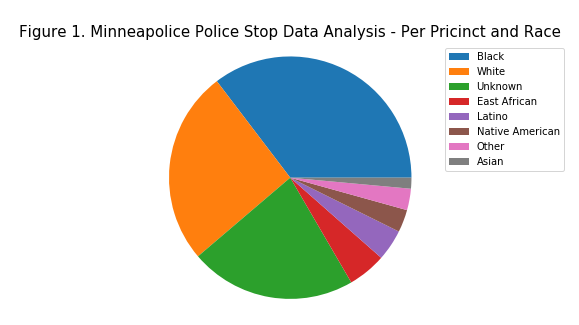

In [180]:
#generating a pie chart on racial demographics 
Race = []
Race.append(df['race'].value_counts())
plt.figure(figsize=(10, 5))
plt.pie(Race[0])
plt.legend(Race[0].index, loc='upper right')
plt.title('\nFigure 1. Minneapolice Police Stop Data Analysis - Per Pricinct and Race',size=15)
plt.axis('equal');

According to the 2018 cences report[2], the minnesota population demographics are White 84%, Black 6.4% ( including East African)..etc. According to this chart, there is more chance the police stops involved a Black person than any other race. 

This data also has 'Unknown' and 'Other' races that we can't quite put in to any of the known Asian, Black, East African, Latino, Native American, and White races. Because the reports from these catagories is large, we can't just ignore the implications of these percentage. 

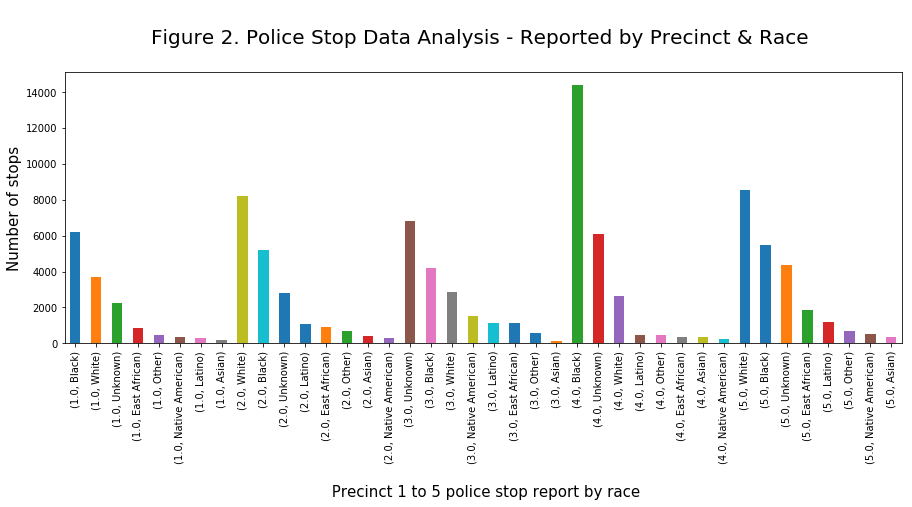

In [181]:
#Now lets look at these race desparity per pricinct and neighbourhood
plt.figure(figsize=(15,5))
df.groupby('policePrecinct')['race'].value_counts().plot(kind='bar');
plt.title('\nFigure 2. Police Stop Data Analysis - Reported by Precinct & Race \n', size=20)
plt.ylabel('Number of stops' , size=15)
plt.xlabel('\n Precinct 1 to 5 police stop report by race' , size=15);

These data revels more insite that we couldn't tell from the pie chart. For District 2 and 5, a person of white race is more prone to be stoped than other racess. It migh also be because the white race is much greater and the graph is just showing proportional result.

The next big race with small percentage change is blacks, followed by East Africans. If we look at districst 1, 3, and 4, Black people are more frequently stoped than others followed by unknown and whites. For district 4 specifically, the ratio of blacks being stoped is so high, its the outlier for the entire police stop per race per destrict. The next part is to get the actual probability rate for each race in different precincts. We can also see that, the Asian Race being stoped by plice is much lower than any other race in all precincts. 

Next, let's see how the data is shapped with in the 910 days period of time.

In [30]:
time_series = df.groupby('race')['responseDate','citationIssued'].describe()
time_series

responseDate                                   \
                       count unique                  top freq   
race                                                            
Asian                   1473    710  2018-07-19 00:00:00   10   
Black                  35800    911  2017-10-04 00:00:00   96   
East African            5174    900  2018-09-13 00:00:00   20   
Latino                  4222    889  2017-04-11 00:00:00   16   
Native American         3048    846  2017-08-24 00:00:00   14   
Other                   2896    840  2017-02-22 00:00:00   11   
Unknown                22438    911  2017-10-20 00:00:00   55   
White                  26213    910  2018-07-19 00:00:00   85   

                                                          citationIssued  \
                               first                 last          count   
race                                                                       
Asian            2016-11-01 00:00:00  2019-04-29 00:00:00            977   
Black            2016-10-31 00:00:00  2019-04-29 00:00:00          25145   
East African     2016-11-01 00:00:00  2019-04-28 00:00:00           3538   
Latino           2016-11-01 00:00:00  2019-04-29 00:00:00           2795   
Native American  2016-11-01 00:00:00  2019-04-28 00:00:00           2008   
Other            2016-11-01 00:00:00  2019-04-28 00:00:00           1892   
Unknown          2016-10-31 00:00:00  2019-04-29 00:00:00          16280   
White            2016-11-01 00:00:00  2019-04-29 00:00:00          17530   

                                              
                unique top   freq first last  
race                                          
Asian                2  NO    784   NaN  NaN  
Black                2  NO  20041   NaN  NaN  
East African         2  NO   2963   NaN  NaN  
Latino               2  NO   2115   NaN  NaN  
Native American      2  NO   1787   NaN  NaN  
Other                2  NO   1567   NaN  NaN  
Unknown              2  NO  15515   NaN  NaN  
White                2  NO  14118   NaN  NaN

### Algorithms and Techniques

## III. Methodology

### Getting the data & Data Processing

The data is collected from the www.minneapolismn.gov/opendata readily available for public at anytime. Although there are multiple formats available to download, excel format is used for this report. 

The responseDate column had data, time, and code at first. Since there is only one time data in the response date, the time values have been dropped from analysis. The codes 'T' & '000Z' have been placed at the beggining & end of the responseDate time values also have been dropped. 

For manupulation data numpy padas, and matplotlib libraries have been used to calculate, analyze and plots for visualizations. The data is fed using pandas Dataframe module and used throughtout the code.  

## IV. Results and Conclusions

## V. Future Improvements

## References

1. Opendata.mninneapolismn.gov. (2019). Police Stop Data. [online] Available at: http://opendata.minneapolismn.gov/datasets/police-stop-data [Accessed 28 Apr. 2019].

2. Census Bureau QuickFacts. (2019). U.S. Census Bureau QuickFacts: Minnesota. [online] Available at: https://www.census.gov/quickfacts/fact/table/mn/PST045218 [Accessed 3 May 2019].